In [1]:
!git clone https://github.com/Leejunho123/5G_project.git
%cd 5G_project/DeepLearning/

Cloning into '5G_project'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 11114 (delta 58), reused 48 (delta 28), pack-reused 11028
Receiving objects: 100% (11114/11114), 245.91 MiB | 30.20 MiB/s, done.
Resolving deltas: 100% (2596/2596), done.
Checking out files: 100% (243/243), done.
/content/5G_project/DeepLearning


## 27 테일러 급수 미분

### 27.1 sin 함수 구현

In [2]:
import numpy as np
from dezero import Function

class Sin(Function):
  def forward(self, x):
    y = np.sin(x)
    return y

  def backward(self, gy):
    x = self.inputs[0].data
    gx = gy * np.cos(x)
    return gx


def sin(x):
  return Sin()(x)



In [3]:
from dezero import Variable

x = Variable(np.array(np.pi/4))
y = sin(x)
y.backward()

print(y.data)
print(x.grad)


0.7071067811865475
0.7071067811865476


### 27.2 테일러 급수 이론

### 27.3 테일러 급수 구현

In [10]:
import math

def my_sin(x, threshold=0.0001):
  y = 0
  for i in range(100000):
    c = (-1) ** i / math.factorial(2 * i +1)
    t = c * x ** (2 * i +1)
    y = y + t
    if abs(t.data) < threshold :
      break
  
  return y

x = Variable(np.array(np.pi/4))
y = my_sin(x)
y.backward()
x.name = 'x'
y.name = 'y'
print(y.data)
print(x.grad)

0.7071064695751781
0.7071032148228457


### 27.4 계산 그래프의 시각화

In [11]:
import numpy as np
from dezero import Variable
from dezero.utils import plot_dot_graph, get_dot_graph

In [12]:
plot_dot_graph(y, verbose=False, to_file='my_sin.png')

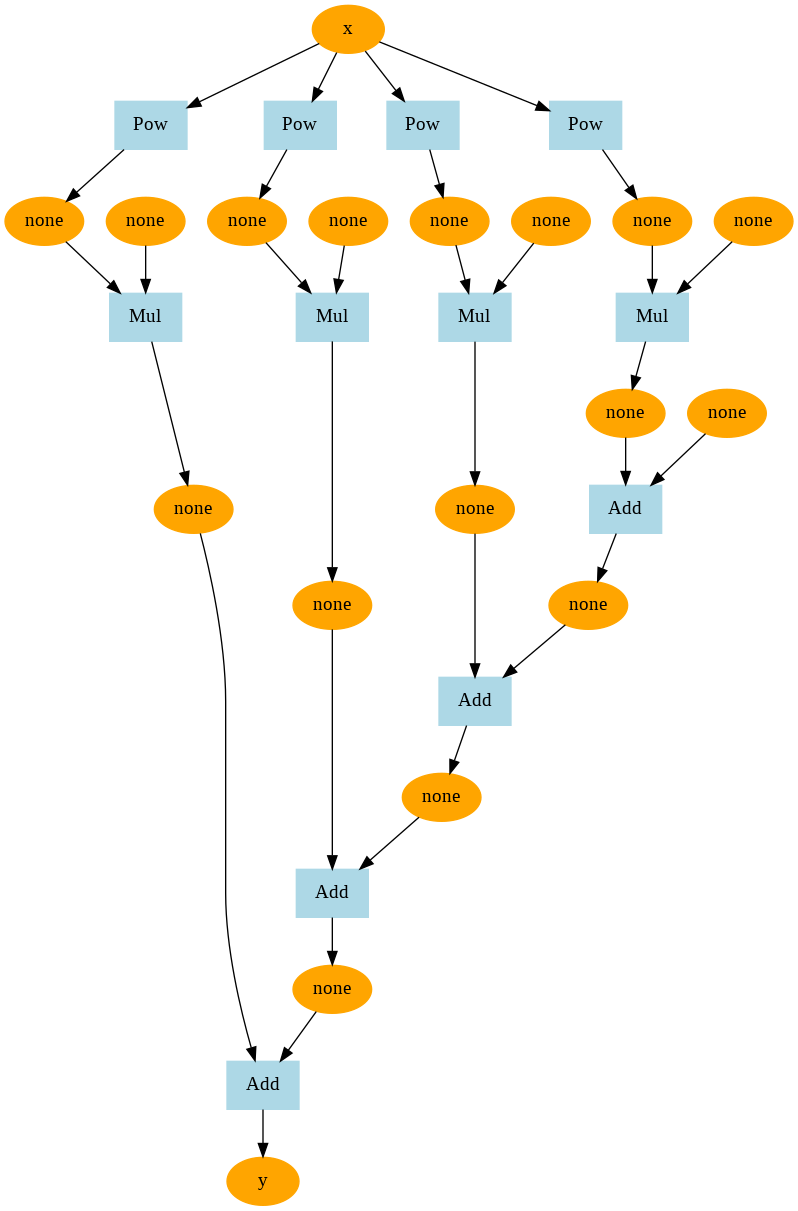